In [1]:
import scipy.io
import numpy as np
from utils import *
import pandas as pd
%load_ext autoreload
%autoreload 2

In [2]:
psl_df_main = pd.DataFrame()
df_main = pd.DataFrame()
model_list = ['iIT341', 'iJO1366', 'iML1515', 'iNJ661', 'iPC815', 'iSSON_1240', 'iYL1228', 'STM_v1_0', 'e_coli_core']
# model_list = ['iIT341']

for model in model_list:
    mat = scipy.io.loadmat("../results/" + model + "/Castle_one_norm.mat")
    # Get the minRe data
    data = mat["data"][0][0][-1][0]
    df = preprocess(data)
    df["Organism"] = model
    
    df_new = pd.read_csv("../results/" + model + "/" + model + "_PSL_RSL_one_norm_100.csv", index_col=0)
    df["Type"] = df_new["Type"]
    df["Rxn_1_Active"] = np.abs(df_new["Rxn_1_Min"]) > 0
    df["Rxn_2_Active"] = np.abs(df_new["Rxn_2_Min"]) > 0
    df["Rxn_1_Min"] = df_new["Rxn_1_Min"]
    df["Rxn_2_Min"] = df_new["Rxn_2_Min"]
    df["v1"] = df_new["v1"]
    df["v2"] = df_new["v2"]
    
    # Same for psl_rsl dataframe
    psl_df = df.loc[df["Type"]=="PSL",:].copy()
    psl_rxn1_mask = (psl_df["Rxn_1_Active"] == True)   
    psl_df.loc[psl_rxn1_mask, "num_diff"] = psl_df.loc[psl_rxn1_mask, "num_diff"]*-1
    psl_df.loc[psl_rxn1_mask, "net_diff"] = psl_df.loc[psl_rxn1_mask, "net_diff"]*-1
    psl_df_main = psl_df_main.append(psl_df)
        
    # Get the PSL, rxn1 active and invert sign when rxn1 is active    
    # Because diff = flux1 - flux2 (< 0 => flux2 > flux 1)
    df_psl_rxn1 = ((df["Type"]=="PSL")&(df["Rxn_1_Active"]==True))
    df.loc[df_psl_rxn1, "num_diff"] = df.loc[df_psl_rxn1, "num_diff"]*-1
    df.loc[df_psl_rxn1, "net_diff"] = df.loc[df_psl_rxn1, "net_diff"]*-1
    
    # psl_df["Active_Reaction"] = np.select([rxn1_mask, rxn2_mask], [psl_df["Rxn_1"], psl_df["Rxn_2"]], default=np.nan)    
    # grouped_psl = psl_df.groupby(["Active_Reaction"])["Active_Reaction"].count()
    # psl_counts[model] = list(grouped_psl)
    
    df_select = df[["Organism", "sl_size", "common_sl_size", "num_diff", "net_diff"]]
    df_main = df_main.append(df_select)
    # display(df_new)
    # display(psl_df)

0 503


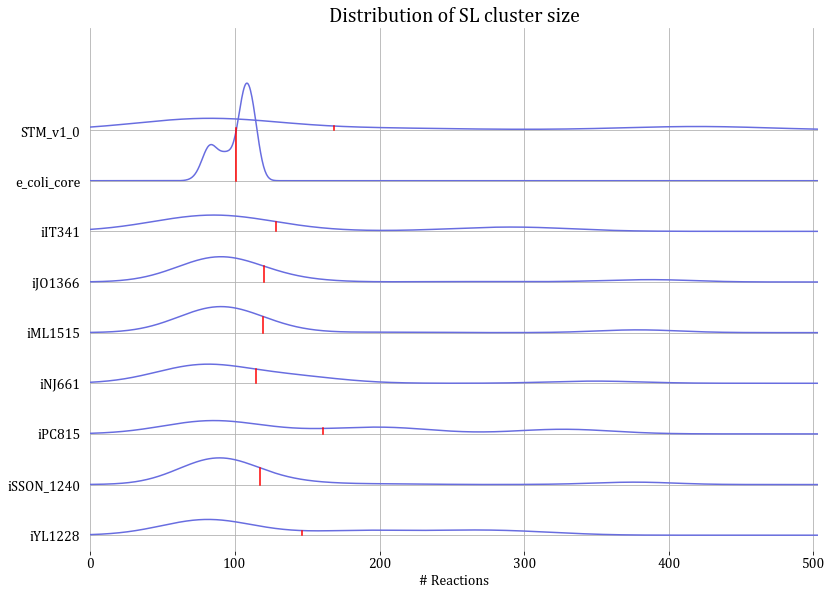

,sl_size
Organism,
STM_v1_0,134.946746
e_coli_core,40.852273
iIT341,79.395349
iJO1366,67.744361
iML1515,66.943860
iNJ661,60.320000
iPC815,125.079365
iSSON_1240,63.800752
iYL1228,104.270833


0 460


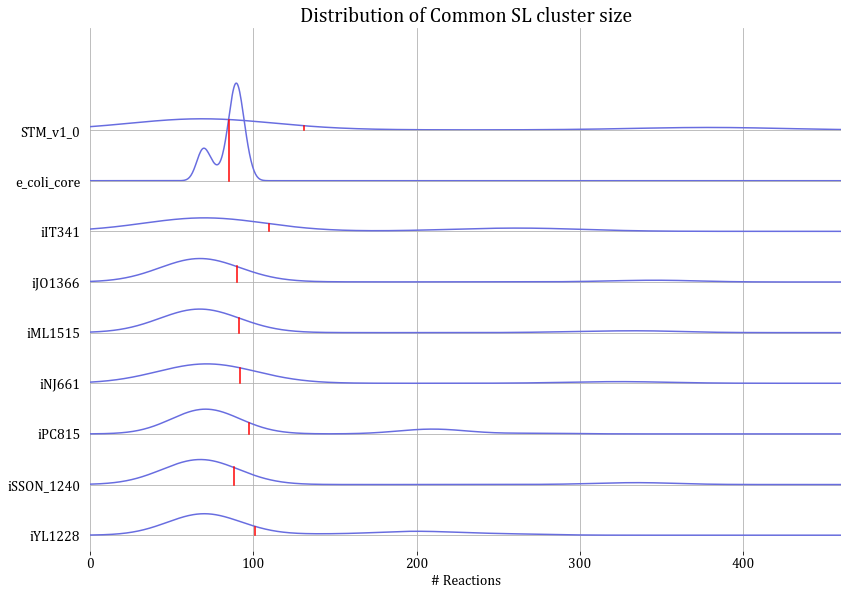

,common_sl_size
Organism,
STM_v1_0,91.579882
e_coli_core,27.011364
iIT341,61.651163
iJO1366,34.187970
iML1515,35.389474
iNJ661,36.493333
iPC815,44.349206
iSSON_1240,31.481203
iYL1228,49.555556


-357.0 358.0


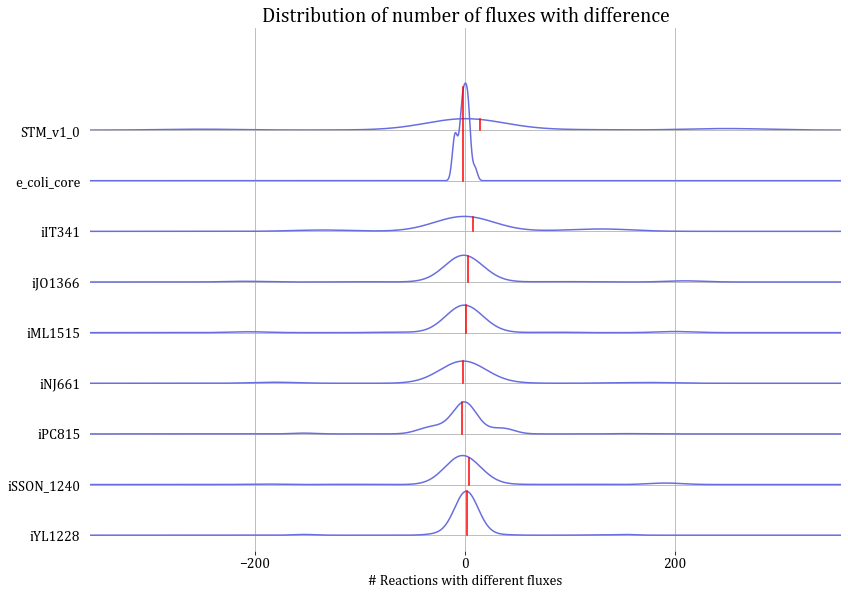

,num_diff
Organism,
STM_v1_0,19.751479
e_coli_core,-2.352273
iIT341,10.279070
iJO1366,3.654135
iML1515,1.238596
iNJ661,-2.800000
iPC815,-4.296296
iSSON_1240,5.642857
iYL1228,2.437500


-302.71123068629606 307.1216625501839


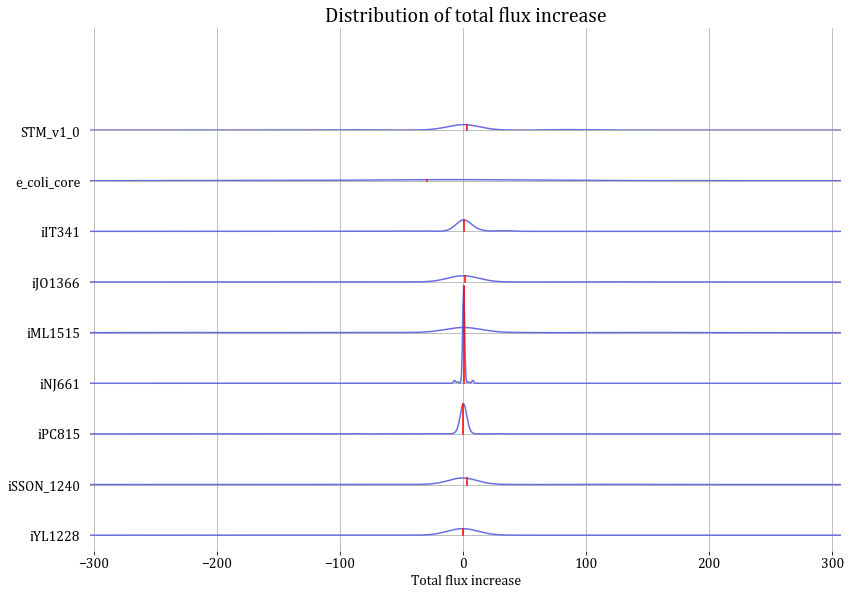

,net_diff
Organism,
STM_v1_0,3.739607
e_coli_core,-41.109259
iIT341,0.385085
iJO1366,1.936701
iML1515,-0.126835
iNJ661,-0.030508
iPC815,-0.921465
iSSON_1240,3.774015
iYL1228,-0.990975


In [3]:
columns_of_interest = ["sl_size", "common_sl_size", "num_diff", "net_diff"]
fname_list = ["sl_cluster_size", "common_sl_size", "num_diff", "net_diff"]
title_list = ["Distribution of SL cluster size", "Distribution of Common SL cluster size", \
              "Distribution of number of fluxes with difference", "Distribution of total flux increase"]
xlabel_list = ["# Reactions", "# Reactions", "# Reactions with different fluxes", "Total flux increase"]

for col, fname, title, xlabel in zip(columns_of_interest, fname_list, title_list, xlabel_list):
    means = list(df_main[[col, "Organism"]].groupby("Organism").mean()[col])
    
    df_select = df_main[[col, "Organism"]]
    plot_ridge_lines(df_select, "Organism", means, "../results/images/"+fname+".png", \
                     title, xlabel)
    display(df_main[[col, "Organism"]].groupby("Organism").mean())

0 493


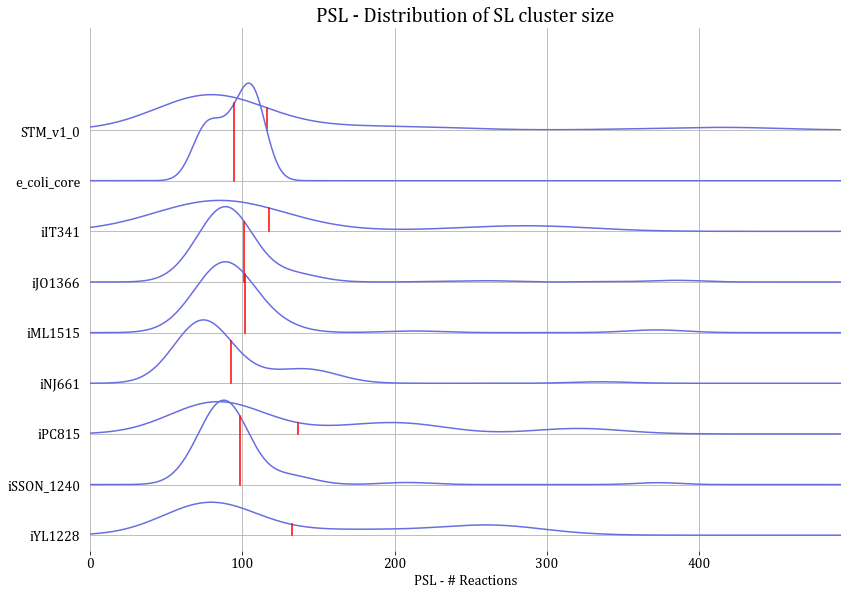

,sl_size
Organism,
STM_v1_0,64.302752
e_coli_core,33.500000
iIT341,65.880000
iJO1366,43.086957
iML1515,44.147541
iNJ661,30.929825
iPC815,92.394558
iSSON_1240,39.132479
iYL1228,87.196581


0 460


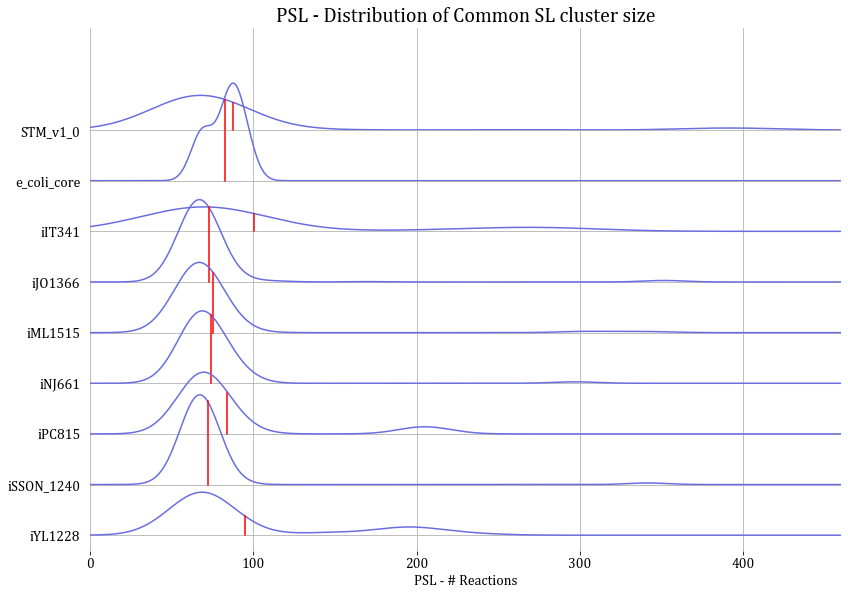

,common_sl_size
Organism,
STM_v1_0,30.871560
e_coli_core,23.400000
iIT341,48.720000
iJO1366,10.208696
iML1515,13.602459
iNJ661,11.543860
iPC815,25.632653
iSSON_1240,8.824786
iYL1228,40.854701


-67.0 352.0


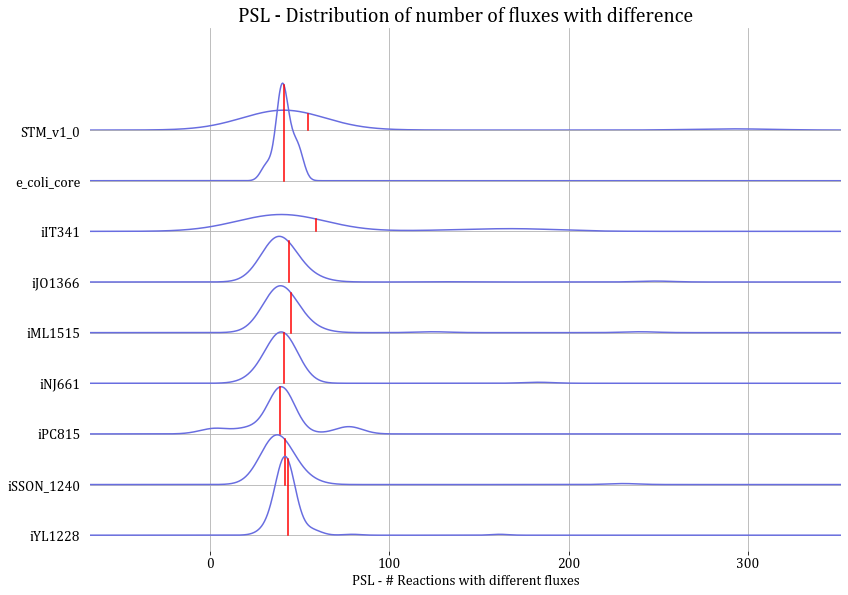

,num_diff
Organism,
STM_v1_0,19.678899
e_coli_core,0.900000
iIT341,25.720000
iJO1366,4.208696
iML1515,5.819672
iNJ661,0.929825
iPC815,-2.190476
iSSON_1240,1.354701
iYL1228,3.777778


-77.15768151552108 219.36659908154198


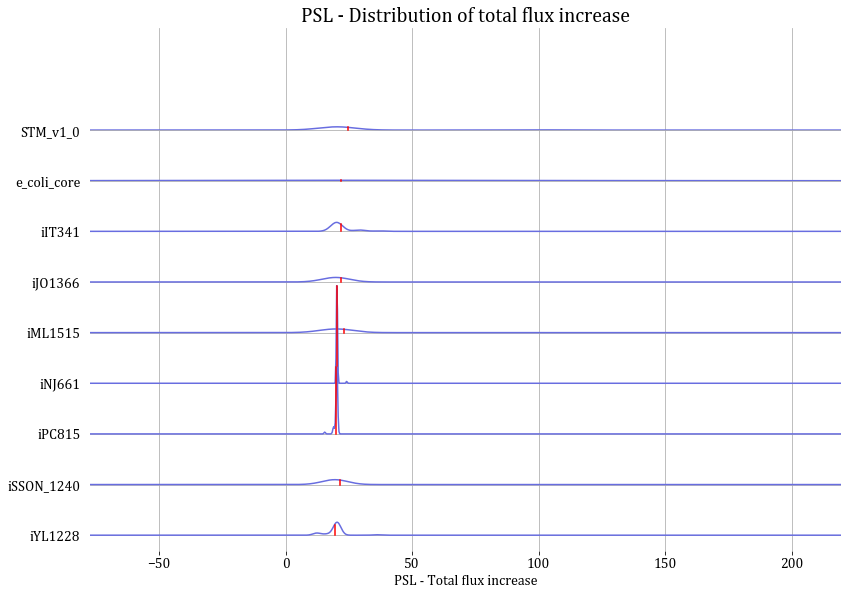

,net_diff
Organism,
STM_v1_0,5.874761
e_coli_core,2.042735
iIT341,2.254071
iJO1366,2.269597
iML1515,3.922389
iNJ661,0.069481
iPC815,-0.381388
iSSON_1240,1.538729
iYL1228,-1.227872


In [4]:
columns_of_interest = ["sl_size", "common_sl_size", "num_diff", "net_diff"]
fname_list = ["psl_sl_cluster_size", "psl_common_sl_size", "psl_num_diff", "psl_net_diff"]
title_list = ["PSL - Distribution of SL cluster size", "PSL - Distribution of Common SL cluster size", \
              "PSL - Distribution of number of fluxes with difference", "PSL - Distribution of total flux increase"]
xlabel_list = ["PSL - # Reactions", "PSL - # Reactions", "PSL - # Reactions with different fluxes", "PSL - Total flux increase"]

for col, fname, title, xlabel in zip(columns_of_interest, fname_list, title_list, xlabel_list):
    means = list(psl_df_main[[col, "Organism"]].groupby("Organism").mean()[col])
    
    df_select = psl_df_main[[col, "Organism"]]
    plot_ridge_lines(df_select, "Organism", means, "../results/images/"+fname+".png", \
                     title, xlabel)
    display(psl_df_main[[col, "Organism"]].groupby("Organism").mean())